<a href="https://colab.research.google.com/github/WorkwithAbhinav/Sleep-Health-Project/blob/main/SleepHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk

In [2]:
df = pd.read_csv('SHALY.csv')
df.head().style.set_properties(**{'background-color':'#2212B0','color':'#E5F21C'})

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.100000,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.200000,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.200000,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.900000,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.900000,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df = df.drop(['Person ID'], axis =1)

In [5]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
df.describe().style.background_gradient(cmap='viridis')

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
df['Sleep Disorder'].describe()

count      374
unique       3
top       None
freq       219
Name: Sleep Disorder, dtype: object

In [8]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

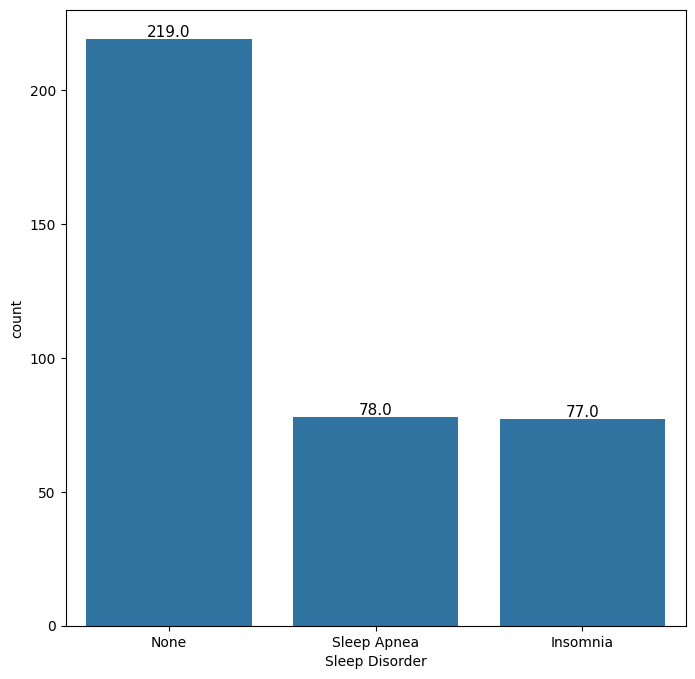

In [9]:
plt.figure(figsize=(8,8))
sns.countplot(x= 'Sleep Disorder' , data = df)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [10]:
df['Quality of Sleep'].value_counts()

8    109
6    105
7     77
9     71
5      7
4      5
Name: Quality of Sleep, dtype: int64

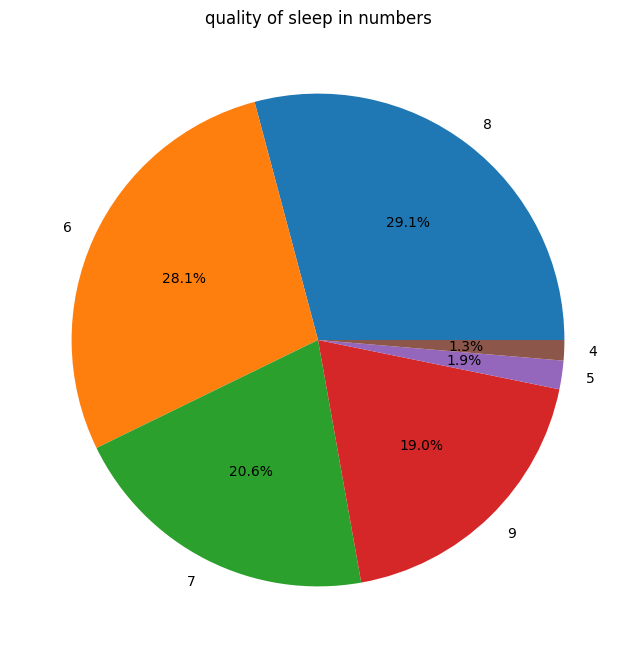

In [11]:
plt.figure(figsize=(8,8))
plt.pie(df['Quality of Sleep'].value_counts(),  labels=df['Quality of Sleep'].value_counts().index, autopct='%1.1f%%')
plt.title('quality of sleep in numbers')
plt.show()

In [12]:
df['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [13]:
df['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

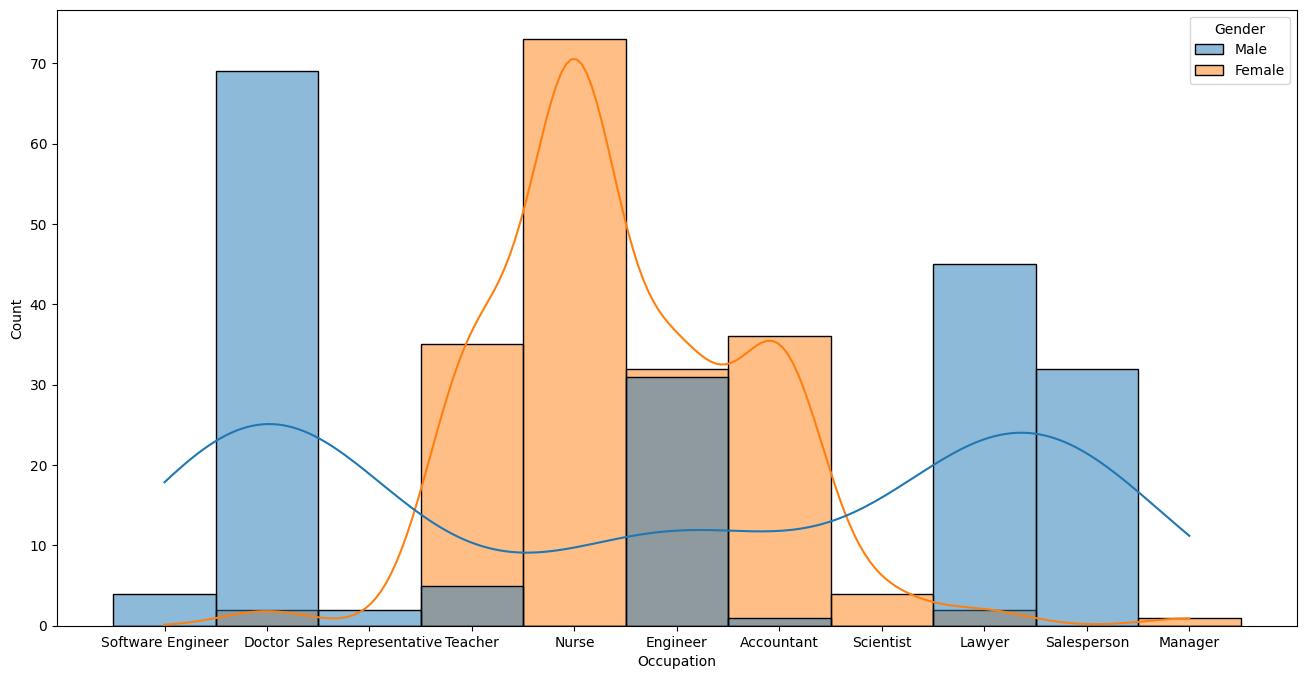

In [14]:
plt.figure(figsize=(16,8))
sns.histplot(data = df , x = 'Occupation' , kde =True , hue = 'Gender')
plt.show()

In [15]:
df['Age'].value_counts()

43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
30    13
29    13
35    12
36    12
41    12
49    11
57     9
52     9
42     9
51     8
54     7
58     6
28     5
40     4
48     3
55     2
56     2
34     2
27     1
Name: Age, dtype: int64

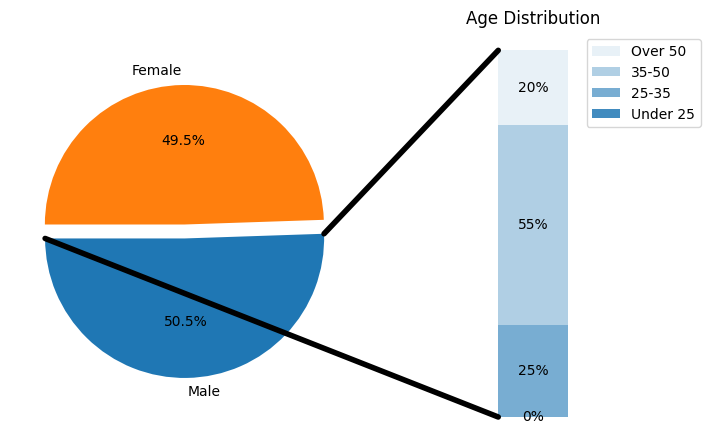

In [16]:
from matplotlib.patches import ConnectionPatch
gender_counts = df['Gender'].value_counts()

# Create figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# Pie chart parameters
overall_ratios = gender_counts.values
labels = gender_counts.index
explode = [0.1, 0]  # Explode the first slice for emphasis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# Bar chart parameters (using age groups as an example)
# You may want to modify this based on your actual age data
age_groups = pd.cut(df['Age'], bins=[0, 25, 35, 50, float('inf')], labels=['Under 25', '25-35', '35-50', 'Over 50'])
age_counts = age_groups.value_counts(normalize=True).sort_index()

age_ratios = age_counts.values
age_labels = age_counts.index
bottom = 1
width = .2

for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label, alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Age Distribution')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# Use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# Draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# Draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

#Sleep Duration and Sleep Quality

In [17]:
df['Sleep Duration'].value_counts()

7.2    36
6.0    31
7.8    28
6.5    26
6.1    25
7.7    24
6.6    20
7.1    19
8.1    15
7.3    14
8.4    14
6.3    13
8.5    13
8.0    13
6.2    12
8.2    11
7.6    10
6.4     9
7.9     7
7.4     5
6.7     5
7.5     5
6.8     5
8.3     5
5.9     4
6.9     3
5.8     2
Name: Sleep Duration, dtype: int64

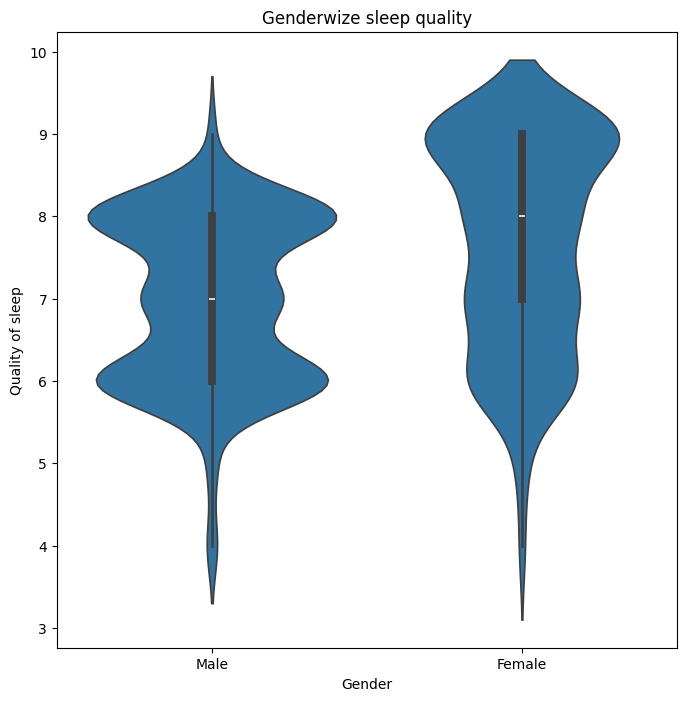

In [18]:
plt.figure(figsize=(8,8))
sns.violinplot( data = df , x ='Gender' , y = 'Quality of Sleep')
plt.xlabel('Gender')
plt.ylabel('Quality of sleep')
plt.title('Genderwize sleep quality')
plt.show()

In [19]:
df.groupby('Sleep Disorder')['Gender'].value_counts()

Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
None            Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: Gender, dtype: int64

<ipython-input-20-e9652d09c1e0>:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.swarmplot(x='Age'
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 76.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 84.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplo

[]

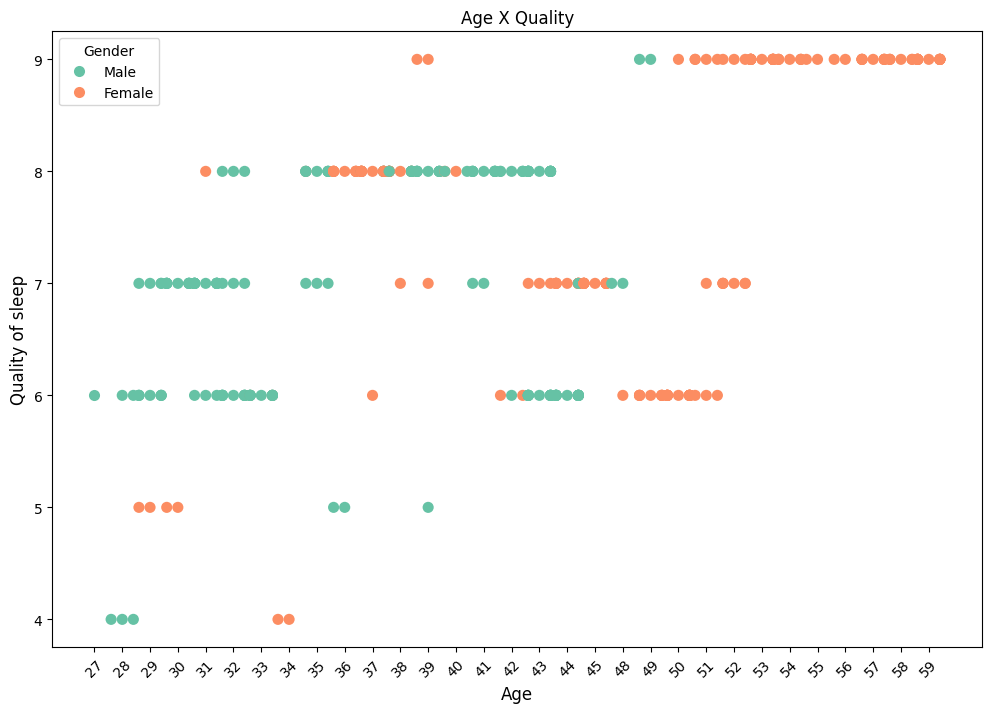

In [20]:
color_palette = sns.color_palette('Set2')
plt.figure(figsize=(12,8))
sns.swarmplot(x='Age'
                , y= 'Quality of Sleep',
              hue ='Gender',
              data = df
              , palette=color_palette,
              size =8)
plt.xlabel('Age' , fontsize=12)
plt.ylabel('Quality of sleep' , fontsize=12)
plt.title('Age X Quality' , fontsize =12)
plt.legend(title='Gender', fontsize=10)
plt.xticks(rotation=45)
plt.plot()

In [21]:
df['Heart Rate'].value_counts()

68    94
70    76
72    69
65    67
75    36
78     5
85     3
80     3
84     2
83     2
73     2
67     2
74     2
77     2
81     2
76     2
69     2
86     2
82     1
Name: Heart Rate, dtype: int64

<ipython-input-22-c0f04025d8eb>:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.swarmplot(x='Heart Rate'
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 86.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 93.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 88.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 87.0% of the points cannot be placed; you may want to decrease the size of the markers or use s

[]

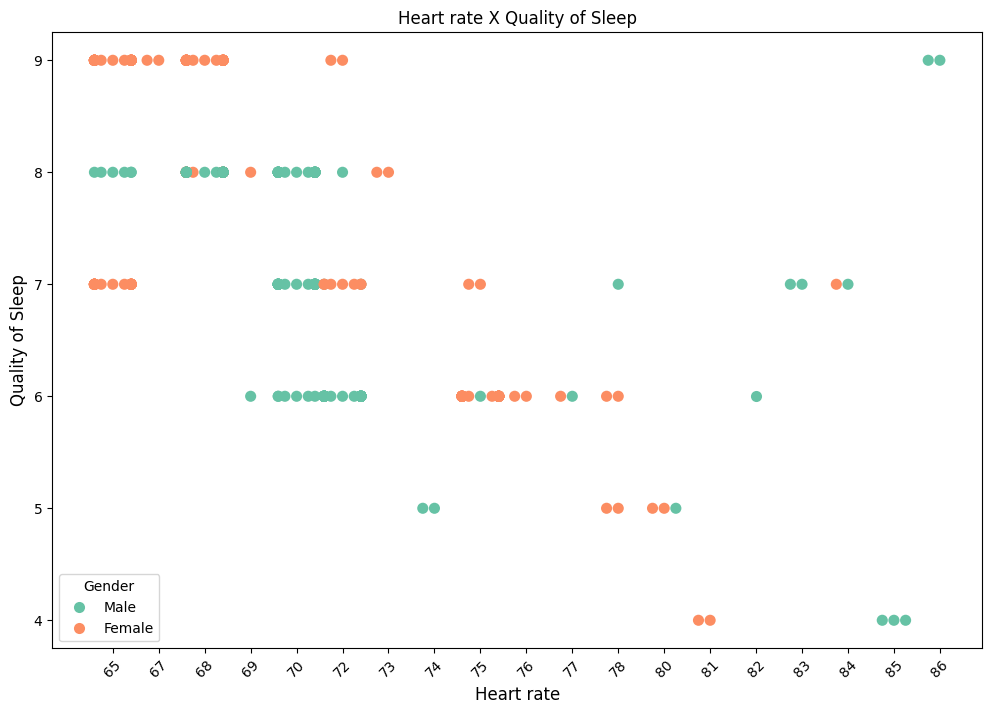

In [22]:
color_palette = sns.color_palette('Set2')
plt.figure(figsize=(12,8))
sns.swarmplot(x='Heart Rate'
                , y= 'Quality of Sleep',
              hue ='Gender',
              data = df
              , palette=color_palette,
              size =8)
plt.xlabel('Heart rate' , fontsize=12)
plt.ylabel('Quality of Sleep' , fontsize=12)
plt.title('Heart rate X Quality of Sleep' , fontsize =12)
plt.legend(title='Gender', fontsize=10)
plt.xticks(rotation=45)
plt.plot()

In [23]:
df['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

<ipython-input-24-d72335d8e9a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BMI Category',
<ipython-input-24-d72335d8e9a5>:2: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  sns.countplot(x='BMI Category',


<Axes: xlabel='BMI Category', ylabel='count'>

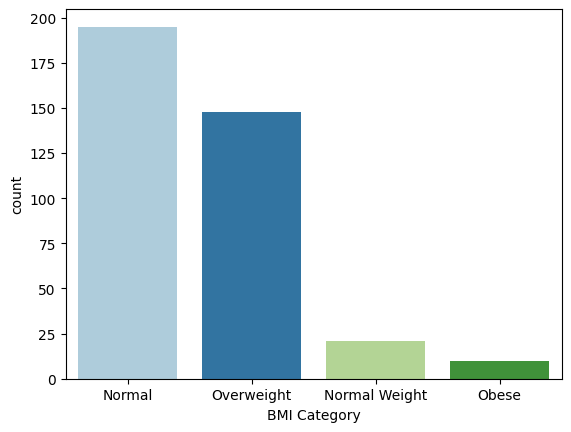

In [24]:
colpal= sns.color_palette("Paired")
sns.countplot(x='BMI Category',
                order=df['BMI Category'].value_counts().index,
                data = df,
              palette =colpal
                )

In [25]:
df['Daily Steps'].value_counts()

8000     101
6000      68
5000      68
7000      66
10000     36
5500       4
3000       3
3500       3
4000       3
6800       3
4800       2
7300       2
7500       2
4200       2
3300       2
5600       2
5200       2
4100       2
3700       2
6200       1
Name: Daily Steps, dtype: int64

Daily Steps BMI Category

<ipython-input-26-b5b80a095c6a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Daily Steps',
<ipython-input-26-b5b80a095c6a>:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.boxplot(x='Daily Steps',


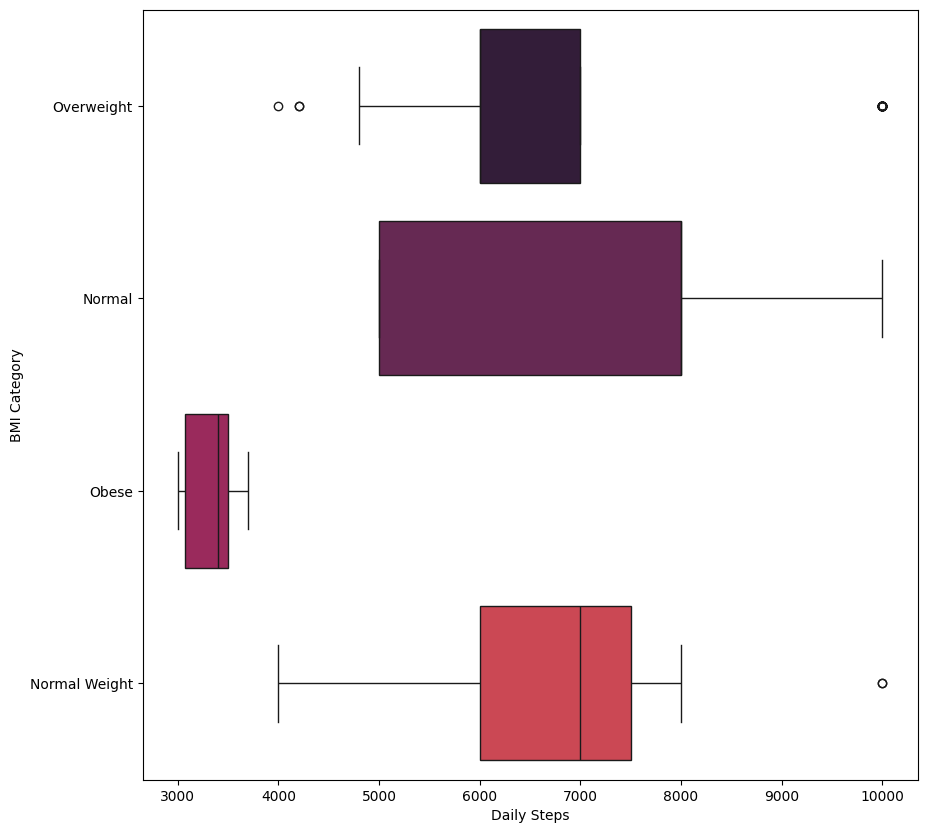

In [26]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Daily Steps',
            y ='BMI Category',
            data = df,
            palette=sns.color_palette("rocket"))
plt.show()

In [27]:
fig = px.histogram(df,
                  x='Sleep Disorder',barmode = "group",
                   color = 'Sleep Disorder',
                  color_discrete_sequence=['white', '#4A235A', '#C39BD3'],
                  text_auto=True)

fig.update_layout(title='<b>Sleep disorder graph</b>',
                  paper_bgcolor='#7DDAC7',
                  plot_bgcolor='#7DDAC7',
                  title_xanchor = 'auto',
                  title_font_size=25,
                  legend_font_family="Droid Sans",
                  title_yanchor='top',
                  legend_bgcolor='#DA7F7D',
                  showlegend =True)
fig.update_yaxes(showgrid=False)

fig.show()

In [28]:
fig = px.scatter_3d(df, x='BMI Category', y='Heart Rate', z='Blood Pressure', color='BMI Category' , width =1000 , height = 1000,
                    color_discrete_sequence=['#D16D4D', '#63D14D', '#4D8BD1','#C39BD3']
                    )
fig.update_layout(title_text='<b>Heart Rate vs BP vs BMI</b>',
                  title_font={'size': 20, 'family': 'serif'},
                  showlegend=True)

fig.show()

In [29]:
fig = px.treemap(df, path=[px.Constant('Jobs'), 'Sleep Disorder', 'Occupation'],
                 color='Sleep Disorder',
                 color_discrete_sequence=['#D16D4D', '#63D14D', '#4D8BD1', '#C39BD3'])
fig.update_layout(title_text='<b>Sleep Disorder vs Occupation </b>',
                  title_font={'size': 20, 'family': 'serif'},
                  showlegend=True)
fig.show()

# DATA PREPROCESSING


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [31]:
df.select_dtypes(include=['object'])

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
0,Male,Software Engineer,Overweight,126/83,None
1,Male,Doctor,Normal,125/80,None
2,Male,Doctor,Normal,125/80,None
3,Male,Sales Representative,Obese,140/90,Sleep Apnea
4,Male,Sales Representative,Obese,140/90,Sleep Apnea
...,...,...,...,...,...
369,Female,Nurse,Overweight,140/95,Sleep Apnea
370,Female,Nurse,Overweight,140/95,Sleep Apnea
371,Female,Nurse,Overweight,140/95,Sleep Apnea
372,Female,Nurse,Overweight,140/95,Sleep Apnea


In [32]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [33]:
df['Blood Pressure'] = df['Blood Pressure'].apply(lambda X : 0 if X in ['120/80',
                                                                        '126/83','125/80','128/84',
                                                                        '129/84','117/76','118/76','115/75',
                                                                        '125/82','122/80'] else 1)
#normal bp = 0
# else 1

In [34]:
df['Blood Pressure'].unique()

array([0, 1])

#label encoder

In [35]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
temp = ['Gender','Age','Occupation','Sleep Duration','Physical Activity Level','BMI Category','Heart Rate','Daily Steps','Sleep Disorder']
for y in temp :
  df[y]= LE.fit_transform(df[y])

In [36]:
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [37]:
print(y)

[1 1 1 2 2 0 0 1 1 1 1 1 1 1 1 1 2 2 0 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 2 2 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 2 0 1 2 2 2 2 2 2 2 2 2 2 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 1 1 2 2 2 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train , y_test = train_test_split(x,y,test_size=0.33,random_state=32,shuffle=True)

In [39]:
print("xTrain dimensions : ", x_train.shape)
print("x_test dimensions : " ,x_test.shape)
print("y_train dimensions : " ,y_train.shape)
print("y_test dimensions : ", y_test.shape)

xTrain dimensions :  (250, 11)
x_test dimensions :  (124, 11)
y_train dimensions :  (250,)
y_test dimensions :  (124,)


In [40]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR = LR.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [41]:
LR_training_score=round(LR.score(x_train,y_train)*100,2)
LR_testing_score=round(LR.score(x_test,y_test)*100,2)

print(f"LR training score :",LR_training_score)
print("LR testing score :",LR_testing_score)

LR training score : 91.6
LR testing score : 91.13


#Gradient Boosting Classifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier().fit(x_train,y_train)

In [43]:
GBC_training_score=round(GBC.score(x_train,y_train)*100,2)
GBC_testing_score=round(GBC.score(x_test,y_test)*100,2)

print(f"GBC training score :",GBC_training_score)
print("GBC testing score :",GBC_testing_score)

GBC training score : 93.6
GBC testing score : 91.13


#SVM

In [44]:
from sklearn.svm import SVC
svm=SVC().fit(x_train,y_train)

In [45]:
SVM_traning_score=round(svm.score(x_train,y_train)*100,2)
SVM_testing_score=round(svm.score(x_test,y_test)*100,2)

print(f"SVM training score :",SVM_testing_score)
print("SVM testing score :",SVM_testing_score)

SVM training score : 87.9
SVM testing score : 87.9


#The GradientBoostingClassifier yields the most accurate predictions for both ML training and testing in this case